# 들어가며

**[아이스브레이킹] 대표적인 Regularization 기법에는 L1 regularization과 L2 regularization이 있다고 합니다. 1과 2는 무엇이 다른 걸까요? 정답을 맞힐 필요는 없이, 떠오르는 생각을 자유롭게 써 봅시다. 2가 1보다 더 좋은 걸까요?**

<details>
<summary>💡예시답안 확인하기💡</summary>

L1과 L2 regularization은 비슷하지만 서로 다른 특징을 가지고 있답니다. 이후 스텝에서 자세히 알아봅시다!
2가 1보다 더 좋고 이런 건 아닙니다...🤣
<details>

## 학습 목표
---
- 정칙화(Regularization)의 개념을 이해하고 정규화(Normalization)와 구분합니다.
- L1 regularization과 L2 regularization의 차이를 설명합니다.
- 실습을 통하여 Lp norm, Dropout, Batch Normalization에 대해 학습합니다.

## 목차
---
1. 들어가며
2. Regularization과 Normalization
3. L1 Regularization
4. L2 Regularization
5. Extra : Lp norm
6. Dropout
7. Batch Normalization

# Regularization과 Normalization
Regularization과 Normalization 이 두 개념은 서로 헷갈리는 경우가 많은 것 같습니다. 한국어로 번역할 때 두 개념이 다 '정규화'로 번역될 때가 많아서 더욱 혼란스러울 때가 많습니다. 우선 두 개념을 아래와 같이 정리해 보겠습니다.

## Regularization(정칙화)
---
정칙화라고 불리며, 오버피팅(overfitting)을 해결하기 위한 방법 중의 하나입니다. 오늘 우리가 가장 중요하게 다룰 주제이기도 하지요. **L1**, **L2 Regularization**, **Dropout**, **Batch normalization** 등이 있습니다. 오버피팅은 한국어로 과적합이라고 하며, train set은 매우 잘 맞히지만, validation/test set은 맞히지 못하는 현상을 말합니다. 비유하자면 오버피팅은 기출문제는 외워서 잘 맞히지만 새로운 응용 문제로 시험을 볼 때는 잘 풀지 못하는 경우라고 할 수 있겠습니다. 더 좋은 결과를 얻기 위해서는 새로운 시험, 즉 test set에서도 잘 맞혀야겠죠? 그래서 regularization 기법들은 모델에 제약 조건을 걸어서 모델의 train loss를 증가시키는 역할을 합니다. 그래서 train loss는 약간 증가하지만 결과적으로, validation loss나 최종 test loss를 감소시키려는 목적을 가지고 있지요.

## Normalization(정규화)
---
**정규화**라고 불리며, 이는 데이터의 형태를 좀 더 의미 있게, 혹은 트레이닝에 적합하게 전처리하는 과정입니다. 데이터를 z-score로 바꾸거나 minmax scaler를 사용하여 0과 1사이의 값으로 분포를 조정하는 것들이 해당됩니다. 예를 들어, 금액과 같은 큰 범위의 값(10,000 ~ 10,000,000)과 시간(0~24)의 값이 들어가는 경우, 데이터의 분포가 피처(feature) 값의 범위에 의해 왜곡되어 학습에 방해가 된다는 문제가 있습니다. normalization은 모든 피처 값의 범위를 동일하게 하여 모델이 풀어야 하는 문제를 좀 더 간단하게 바꾸어 주는 전처리 과정입니다.

이 두 가지 단어는 한국어로 번역 시에 혼용하여 쓰기도 하므로, 앞으로 이번 노드에서는 주로 영어로 표기하도록 하겠습니다. 핵심을 정리하면, regularization은 오버피팅을 막고자 하는 방법, normalization은 트레이닝을 할 때에 서로 범위가 다른 데이터들을 같은 범위로 바꿔주는 전처리 과정이라는 것입니다.

Regularization와 Normalization의 간단한 예제를 [Iris dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset)의 회귀 문제를 풀면서 비교해 보겠습니다.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

Iris data 중 virginica라는 종의 petal length(꽃잎 길이)를 X, sepal length(꽃받침의 길이)를 Y로 두고 print 해보겠습니다.

In [ ]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print("petal length(꽃잎 길이)", X)
print("sepal length(꽃받침의 길이)", Y)

값으로만 보니 직관적으로 잘 와닿지 않네요! 산점도로 그려봅시다.

아직 normalization을 하지 않았기 때문에 x축과 y축은 각각의 최솟값과 최댓값의 범위로 그려집니다.

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

그래프의 축을 잘 살펴보세요!

이제 0-1로 normalization을 해주는 `minmax_scale`를 이용해서 산점도를 다시 한번 그려보겠습니다.

In [ ]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

결과를 비교해 보면, 가장 큰 값을 1, 가장 작은 값을 0으로 하여 **축 범위가 바뀜**을 확인할 수 있습니다. 데이터의 상대적인 분포는 바뀌지 않았지만, 피처의 스케일이 0과 1 사이로 변환되었으므로 이후 X, Y의 관계를 다루기 용이해졌습니다.

이번엔 같은 데이터로 간단한 회귀 문제를 풀면서 regularization에 대해 알아보겠습니다.

`sklearn.linear_model`에 포함된 `LinearRegression` 모델을 사용하여 X-Y 관계를 선형으로 모델링해 보겠습니다. 이 `sklearn.linear_model`에는 L1, L2 regression인 `Lasso`와 `Ridge` 모델도 함께 포함되어 있으므로, 이들의 차이점을 먼저 직관적으로 이해해 보겠습니다. 수학적 정의나 보다 구체적인 설명은 다음 스텝에 이어집니다.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다.
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다.
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

위에서 linear regression으로 구한 기울기와 절편을 가지고 일차함수를 만들어 산점도와 함께 그려보겠습니다.

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

이번에는 L1, L2 regularization으로 regression을 해보겠습니다. 이는 `Lasso`, `Ridge`라고 부릅니다.

먼저 L1 regularization인 `Lasso`로 문제를 풀어보겠습니다.

In [ ]:
# Q. linear regression의 코드를 참고하여, 아래 코드를 채워주세요!

# L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
# [[YOUR CODE]]
a, b = # [[YOUR CODE]]
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
# [[YOUR CODE]]
plt.title('petal-sepal scatter with L1 regularization(Lasso)')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

어떤가요? 혹시 기울기가 0으로 나오지 않았나요? `Lasso` 방법은 결과가 별로 좋지 않은 것 같습니다.

이제 같은 데이터셋으로 L2 regularization인 `Ridge`로 문제를 풀어보고 서로 비교해 보겠습니다.

In [ ]:
# Q. linear regression의 코드를 참고하여, 아래 코드를 채워주세요!

# L2 regularization은 Ridge로 import 합니다.
from sklearn.linear_model import Ridge

L2 = Ridge()
# [[YOUR CODE]]
a, b = # [[YOUR CODE]]
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
# [[YOUR CODE]]
plt.title('petal-sepal scatter with L2 regularization(Ridge)')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

다시 다루겠지만, linear regression이 L2 norm과 관련이 있습니다. 그래서 L2 regularization을 쓰는 `Ridge`방법으로는 앞서 linear regression과 큰 차이가 없는 결과가 나옵니다.
그러나 왜 L1 regularization을 쓰는 `Lasso`에서는 이상한 결과가 나왔을까요?

다음 스텝에서 그 이유를 알아보도록 하겠습니다!

# L1 Regularization
이전 스텝에서 regularization과 normalization의 정의를 설명하고, L1/L2 regularization을 코드로 맛보기 해보았습니다. 마지막에 같은 linear regression 문제를 푸는데 L1 regularization에서는 문제가 풀리지 않았다는 것을 기억하시나요?

L1 regularization을 설명하면서, 지난 스텝에서 `Lasso`로는 regression 문제가 제대로 풀리지 않았던 현상을 더 자세히 알아보겠습니다. 그리고 어떤 때에 L1 regularization을 사용하는지 알아보는 것이 목표입니다!

## L1 regularization (Lasso)의 정의
---
L1 regularization은 아래와 같은 식으로 정의됩니다. ($\text{N}$: 데이터의 개수, $\text{D}$: 데이터의 차원(feature의 개수))
$$\hat{\beta ^{\text{lasso}}}:=\text{argmin}_{\beta}\frac{1}{2N}\sum _{i=1}^{N}(y_{i}-\beta_{0}-\sum _{j=1}^D\textbf{x}_{ij}\beta _{j})^2+\lambda \sum _{j=1}^{D}\left | \beta _{j}\right |$$

여기서 중요하게 봐야 할 부분은 $\lambda \sum _{j=1}^{D}\left | \beta _{j}\right |$입니다. 이 부분이 없다면 linear regression과 동일합니다.

이 부분이 바로 L1 norm에 해당하는 부분인데, L1 regularization이라는 이름이 붙은 이유이기도 하고, L2 regularization과의 차이가 나타나는 중요한 부분입니다.

>💡참고 지식 (Lp norm)
>
>norm은 벡터나 행렬, 함수 등의 거리를 나타내는 것으로 우리는 여기서 벡터값만 다룰 예정입니다. Lp norm 의 정의는 아래와 같습니다. (참고) [Norm (mathematics)](https://en.wikipedia.org/wiki/Norm_(mathematics))

$$\left\| \textbf{x}\right\|_{P}:=(\sum _{i=1}^{n}\left | \textbf{x}_{i}\right |^{P})^{\frac{1}{P}}$$

norm에 대해서는 이후 스텝에서 더 자세히 다룰 예정입니다!

그렇다면 $P=1$인 경우의 L1 norm은 $\left\| \textbf{x}\right\|_{1}=\sum _{i=1}^{n}\left | \textbf{x}_{i}\right |$
로 나타낼 수 있습니다.

이는 위에서 봤던 $\lambda \sum _{j=1}^{D}\left | \beta _{j}\right |$에 들어가 있는 수식과 일치합니다!

때문에 $P=1$이므로 L1 regularization이라고 부르는 것입니다.
하지만 사이킷런이나 케라스, 텐서플로우 등의 패키지에서는 `Lasso` 라는 이름을 더 자주 사용합니다. 그럼 저번 시간에 사용해 본 코드의 일부분을 살펴볼까요?

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

In [ ]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

흠... 기울기가 0으로 나오는 것이 아무래도 이상한데요...🤔
아무래도 데이터의 feature 개수가 2개밖에 되지 않으니까 이게 맞는 건지 아직 잘 모르겠습니다. 일단 다른 데이터셋으로 L1 regularization을 한번 더 돌려보겠습니다.

## 컬럼 수가 많은 데이터에서의 L1 regularization 비교
---
Iris 데이터는 특성이 총 4개로 컬럼 수가 너무 적으니 [wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)을 이용해 보겠습니다.
총 13개의 특성을 갖는 데이터입니다.

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

잠깐 데이터셋의 예시를 살펴볼까요?

In [ ]:
wine_df.head(5)

In [ ]:
target_df.head(5)

먼저 linear regression 으로 문제를 풀고, 그 계수(coefficient)와 절대 오차(mean absolute error), 제곱 오차(mean squared error), 평균 제곱값 오차(root mean squared error)를 출력해 보겠습니다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

이번에는 L1 regularization으로 문제를 풀어보겠습니다.

In [ ]:
# Q. 위의 Iris 예제 코드를 참고해서, 빈칸을 채워봅시다.

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
# [[YOUR CODE]]

# 테스트를 해봅시다.
pred = # [[YOUR CODE]]

# 모델 성능은 얼마나 좋을까요?
print("Result of Lasso")
print('Mean Absolute Error:', # [[YOUR CODE]])
print('Mean Squared Error:', # [[YOUR CODE]])
print('Mean Root Squared Error:', # [[YOUR CODE]])

print("\n\n coefficient of Lasso")
print(# [[YOUR CODE]])

## 결과 분석
---
coefficient 부분을 보시면 linear regression과 L1 regularization의 차이가 좀 더 두드러짐을 알 수 있습니다. linear regression에서는 모든 컬럼의 가중치가 0이 아닌 값을 가지고 있지만, L1 regularization에서는 총 13개 중 7개를 제외한 나머지의 값들이 모두 0임을 확인할 수 있습니다. error 부분에서는 큰 차이가 없었지만, 우리가 어떤 컬럼이 결과에 영향을 더 크게 미치는지 확실히 확인할 수 있습니다. 이러한 경우 다른 문제에서도 error의 차이가 크게 나지 않는다면, 차원 축소와 비슷한 개념으로 변수의 값을 7개만 남겨도 충분히 결과를 예측할 수 있습니다. 다만 linear regression과 L1, L2 regularization의 차이 중 하나는 하이퍼파라미터(수식에서는 $\lambda$)가 하나 더 들어간다는 것이고, 그 값에 따라 error에 영향을 미친다는 점입니다.

# L2 Regularization

## L2 Regularization(Ridge)의 정의
---
L2 regularization은 아래와 같은 식으로 정의됩니다.
$$\hat{\beta ^{\text{ridge}}}:=\text{argmin}_{\beta}\frac{1}{2N}\sum _{i=1}^{N}(y_{i}-\beta_{0}-\sum _{j=1}^D\textbf{x}_{ij}\beta _j)^{2}+\lambda \sum _{j=1}^{D}\beta _{j}^{2}$$
아래는 L1 regularization의 정의입니다.
$$\hat{\beta ^{\text{lasso}}}:=\text{argmin}_{\beta}\frac{1}{2N}\sum _{i=1}^{N}(y_{i}-\beta_{0}-\sum _{j=1}^D\textbf{x}_{ij}\beta _j)^{2}+\lambda \sum _{j=1}^{D}\left | \beta _{j} \right |$$
자 이제 두 regularization 수식의 차이가 어디에 있는지 보이시나요? 이전 스텝에서 잠깐 Lp norm을 설명드렸는데, 그것이 L1 / L2 regularization의 이름과 큰 관련이 있다고 하였습니다. L2 regularization에서는 $\lambda \sum _{j=1}^{D}\beta _{j}^{2}$ 부분이 핵심 내용이 됩니다.

$\sum _{j=1}^{D}\beta _{j}^{2}$ &larr; 이 부분이 이전 스텝에서 설명드린 L2 Norm의 형태와 똑같음을 확인할 수 있습니다.

## L1 / L2 Regularization의 차이점
---
L1 regularization이 L2 regularization과 다르게 **왜 일부 컬럼의 가중치를 0으로 보내는지** 증명하는 내용은 이 노드의 범위를 벗어나기 때문에, 대략적으로만 설명해 보겠습니다.

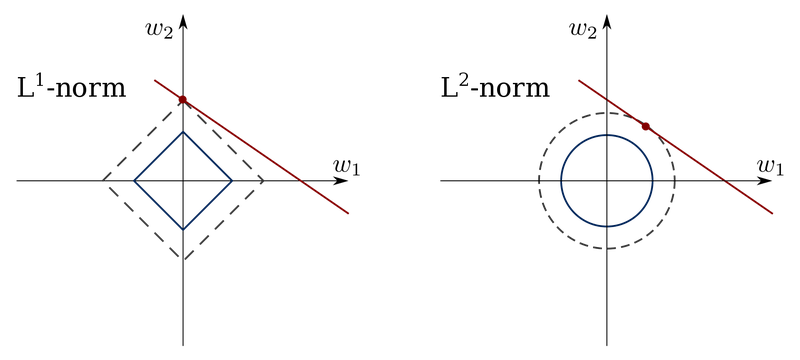
[https://en.wikipedia.org/wiki/Lasso_(statistics)]

위 그림에서, L1 regularization(왼쪽)은 $\left | \text{w}_{1} \right | + \left | \text{w}_{2} \right |$의 값을 최소화하는 것이 목적이므로 마름모 형태의 제약 조건이 생깁니다. 그리고 빨간색 직선은 우리가 풀어야 하는 문제의 해답이 될 수 있는 파라미터($\text{w}_{1}$, $\text{w}_{2}$)들의 집합입니다. 마름모의 크기를 점점 늘렸을 때 ($\left | \text{w}_{1} \right | + \left | \text{w}_{2} \right |$의 값을 증가시켰을 때), 이 직선('정답 파라미터 집합')이 마름모와 만나는 지점이 바로 $\left | \text{w}_{1} \right | + \left | \text{w}_{2} \right |$의 값을 최소화하는 해가 됩니다. L1 regularization은 제약 조건이 꼭지점이 각 축 위에 있는 마름모 모양이기 때문에, '정답 파라미터 집합'과 만나는 지점 역시 축 위에 있을 가능성이 높습니다. 좌표계에서 어떤 점이 축 위에 있다면 몇 개의 좌표는 0 값을 가지게 되죠. 그래서 L1 regularization의 결과를 보면 모델의 일부 coefficient 값이 0으로 나오는 것을 확인할 수 있습니다. 이전 스텝의 Iris dataset 예제에서는 기울기 값이 0으로 나왔고, wine dataset 예제에서도 몇 개의 coefficient가 0으로 바뀌었습니다.

이와 다르게 L2 regularization은 $\text{w}_{1}^{2} + \text{w}_{2}^{2}$값을 최소화하므로 제약 조건이 원의 형태로 나타나게 됩니다. 그러므로 직선과 만나는 지점이 축 위에 있을 가능성보다, 축과 가까운 다른 곳에 있을 가능성이 높습니다. wine dataset 예제에서도 L2 regularization 결과에서는 coefficient가 모두 0이 아닌 값을 가지고 있었죠. 또한 제곱이 들어가 있기 때문에 절댓값으로 L1 norm을 쓰는 Lasso보다는 수렴이 빠르다는 장점이 있습니다. 이는 이전과 같은 문제에서 iteration 조건을 추가하여 실험해보겠습니다.

바로 직관적으로 이해하기 쉽지 않죠? 조금 더 직관적으로 이해하고 싶다면 아래 블로그를 참고해주세요

- [정규화에 대해 자세하게 알아보자!](https://modulabs.co.kr/blog/learn-about-regularization)

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)
print('=3')

L1 regularization으로 iteration 횟수를 5회로 두고 문제를 풀어보겠습니다.

In [ ]:
%%time
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

L2 regularization도 같은 제약조건을 두고 문제를 풀어보겠습니다.

In [ ]:
# Q. L1 regularization 코드를 참고하여 아래 코드를 채워주세요.
%%time
from sklearn.linear_model import Ridge

# [[YOUR CODE]]

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

iteration 값을 5로만 설정해 보아도, L2 regularization의 결과는 linear regression과 같은 값이 나오지만, L1 regularization에서는 앞 step과 같은 값을 확인할 수는 없었습니다. 심지어 수렴하지 않았다는 경고까지 나오는군요! 이는 아직 다른 조건들을 만족하는 답을 찾지 못하였다는 뜻입니다.

정리하면, L1 regularization은 가중치가 적은 벡터에 해당하는 계수를 0으로 보내면서 **차원 축소와 비슷한 역할**을 하는 것이 특징이며, L2 regularization은 계수를 0으로 보내지는 않지만 제곱 텀이 있기 때문에 L1 regularization보다는 **수렴 속도가 빠르다**는 장점이 있습니다. 예를 들어, $\text{A}=\begin{bmatrix} 1,1,1,1,1 \end{bmatrix}$, $\text{B}=\begin{bmatrix} 5, 0, 0, 0, 0 \end{bmatrix}$ 의 경우 L1-norm은 같지만, L2-norm은 같지 않습니다. 즉, 제곱 텀에서 결과에 큰 영향을 미치는 값은 더 크게, 결과에 영향이 적은 값들은 더 작게 보내면서 수렴 속도가 빨라지는 것입니다.

그러므로, 데이터에 따라 적절한 regularization 방법을 활용하는 것이 좋습니다.

# Extra : Lp norm
이전 스텝에서 잠깐 소개해드린 Lp norm에 대해 자세히 설명하겠습니다.
**Norm**이라는 용어는 벡터뿐만 아니라 함수, 행렬의 크기를 나타내는 개념으로, 딥러닝을 배우는 과정에서는 주로 벡터, 좀 더 어렵게는 행렬의 norm 정도만 알면 됩니다.

## Vector norm
---
L1 / L2 regularization에서 배운 norm은 벡터에서 정의된 norm으로 아래와 같습니다.
$$\left\| \text{x} \right\|_{P}:=(\sum _{i=1}^{n} \text{x}_{i}^{P})^{\frac{1}{P}}$$
아래 코드에서 P의 값과 X의 형태를 바꾸어가며 실험해 보세요.

In [ ]:
# [Playground] x와 p를 바꾸어가며 norm 값이 어떻게 변하는지 실험해봅시다!
# --------------------------- #
x = np.array([1,10,1,1,1])
p = 5
# --------------------------- #

norm_x = np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x)
print("result of making norm : %0.5f "%making_norm)

그러면, 이제 P가 우리가 생각하는 자연수가 아닌 경우에는 어떻게 될까요?

$P=\infty$인 infinity norm의 경우는 x에서 가장 큰 숫자를 출력합니다.

$$\left\| \text{x} \right\|_{P}:= \max (\text{x})$$

In [ ]:
norm_x = np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

## Matrix norm
---
행렬의 norm의 경우는 벡터와 조금 다르며, 주로 $P=1, \infty$인 경우만 알면 됩니다.

현재 A는 $\text{m} \times \text{n}$ 행렬입니다.

$$\left\| \text{A} \right\|_{1}= \max_{1\leq j\leq n}\sum _{i=1}^{m}\left | \textbf{a} _{ij} \right |$$

$$\left\| \text{A} \right\|_{\infty }= \max_{1\leq j\leq m}\sum _{i=1}^{n}\left | \textbf{a} _{ij} \right |$$

$P=1$인 경우에는 컬럼(column)의 합이 가장 큰 값이 출력되고. $P=\infty$인 경우에는 로우(row)의 합이 가장 큰 값이 출력됩니다.

In [ ]:
A = np.array([[1,2,3], [1,2,3], [4,6,8]])

one_norm_A = np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

inf_norm_A = np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)

# Dropout
드롭아웃(Dropout) 기법은 2014년도에 나온 논문입니다.

**논문 제목** : Dropout: A Simple Way to Prevent Neural Networks from Overfitting  
**논문 발표 시점** : 2014년  
**논문 링크** : [논문 주소](https://jmlr.org/papers/v15/srivastava14a.html)

드롭아웃 기법이 나오기 전의 신경망은 fully connected architecture로 모든 뉴런들이 연결되어 있었습니다.

드롭아웃이란 확률적으로 랜덤하게 몇 가지의 뉴런만 선택하여 정보를 전달하는 과정입니다. 이름 그대로 몇 가지의 값들을 모든 뉴런에 전달하는 것이 아닌, 확률적으로 버리면서 전달하는 기법입니다. 드롭아웃은 오버피팅을 막는 regularization layer 중 하나입니다. 확률을 너무 높이면 (비활성화된 뉴런의 비중을 높이면) 모델 안에서 값들이 제대로 전달되지 않으므로 학습이 잘 되지 않고, 확률을 너무 낮추는 경우에는 fully connected layer와 같이 동작합니다. fully connected layer에서 오버피팅이 생기는 경우에 주로 dropout layer를 추가합니다.

코드는 간단합니다. 논문이 나온 지도 오래되었기 때문에, 여러 프레임워크에서 간단하게 구현할 수 있도록 되어있습니다.

- [Pytorch Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)

## 실습 (not overfitting)
---
[fashion mnist](https://keras.io/api/datasets/fashion_mnist/)라는 데이터 셋을 불러와서 학습을 시키도록 하겠습니다. 이 데이터셋은 총 10개의 클래스로 구성되어 있고, 데이터가 간단한 편이기도 하여 5 epoch 정도만 학습시켜도 어느 정도 결과가 나옵니다. 드롭아웃 레이어를 중간에 추가하여 확률을 1에 가깝게 주면 어떻게 되는지 살펴보도록 하겠습니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, random_split

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('=3')

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

dropout의 확률을 0.9로 주었을 때의 결과를 살펴보도록 하겠습니다.

In [ ]:
class ClassifierModel(nn.Module):
    def __init__(self, dropout_rate):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")


In [ ]:
%%time
model_with_dropout = ClassifierModel(dropout_rate=0.9).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_with_dropout.parameters(), lr=0.001)

train(model_with_dropout, train_loader, criterion, optimizer, epochs=5)

dropout이 없을 때 실습을 해보면, 5 epoch 정도만 돌려도 충분히 높은 정확도를 볼 수 있습니다.

In [ ]:
%%time
model_without_dropout = ClassifierModel(dropout_rate=0).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_without_dropout.parameters(), lr=0.001)

train(model_without_dropout, train_loader, criterion, optimizer, epochs=5)

현재 이 데이터 셋은 학습이 잘 되는 데이터 셋으로, fully connected layer에서도 결과가 잘 나옴을 확인할 수 있는데요. 일부러 중간에 dropout layer를 추가하여 0.9의 확률 값을 주니 학습이 안 됨을 확인하였습니다. 다음은 overfitting이 나는 환경에서 dropout의 중요성을 알아보도록 하겠습니다.

## 실습 (overfitting)
---
overfitting이 되는지 확인해 보려면 train set과 validation set의 loss function을 그려보는 것이 가장 첫 번째 시도입니다. 우리는 위의 데이터를 이제 train:valid=99:1의 비율로 나눈 뒤에 loss function의 값을 그려보고, overfitting이 생기는 fully connected layer를 만들어보도록 합시다. overfitting이 되게 하기 위해 의도적으로 train set을 99%로 늘리고 validation set을 줄였습니다.

>📖 학습팁
>
>아래 코드는 200 epoch이므로 코드가 돌아가는데 5분이상 소요됩니다. 그동안 overfitting에 대한 자료를 찾아보면서 기다려주세요!

In [ ]:
train_size = int(0.99 * len(train_dataset))
valid_size = len(train_dataset) - train_size
train_data, valid_data = random_split(train_dataset, [train_size, valid_size])

train_loader = DataLoader(train_data, batch_size=512, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=512, shuffle=False)

In [ ]:
class OverfitModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
def train(model, train_loader, valid_loader, criterion, optimizer, epochs=200):
    train_loss, valid_loss, train_acc, valid_acc = [], [], [], []
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct_train, total_train = 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total_train += labels.size(0)
            correct_train += predicted.eq(labels).sum().item()
        train_loss.append(total_loss / len(train_loader))
        train_acc.append(100 * correct_train / total_train)

        model.eval()
        temp_loss, correct_valid, total_valid = 0, 0, 0
        with torch.no_grad():
            for images, labels in valid_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                temp_loss += loss.item()
                _, predicted = outputs.max(1)
                total_valid += labels.size(0)
                correct_valid += predicted.eq(labels).sum().item()
        valid_loss.append(temp_loss / len(valid_loader))
        valid_acc.append(100 * correct_valid / total_valid)
        model.train()

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss[-1]:.4f}, Valid Loss: {valid_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.2f}%, Valid Acc: {valid_acc[-1]:.2f}%")
    return train_loss, valid_loss, train_acc, valid_acc

In [ ]:
%%time
# Dropout이 없는 모델 학습
model_overfit = OverfitModel().to(device)
optimizer = optim.Adam(model_overfit.parameters(), lr=0.001)
train_loss, valid_loss, train_acc, valid_acc = train(model_overfit, train_loader, valid_loader, criterion, optimizer)

In [ ]:
# loss 값을 plot 해보겠습니다.
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(valid_loss, label='Validation Loss', color='red')
plt.legend()
plt.title('Loss Graph without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [ ]:
# accuracy 값을 plot 해보겠습니다.
plt.plot(train_acc, label='Train Accuracy', color='blue')
plt.plot(valid_acc, label='Validation Accuracy', color='red')
plt.legend()
plt.title('Accuracy Graph without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

dropout layer가 없는 fully connected layer에서 200번 정도의 학습을 하니 train set의 accuracy는 올라가고, loss는 점점 떨어졌습니다. 그러나 validation set의 accuracy와 loss는 어느 정도 값에서 수렴함을 볼 수 있었습니다.
이렇게 오버피팅을 만든 환경에서 dropout layer를 추가한 뒤 나머지 환경은 같게 한 실험을 살펴보도록 하겠습니다.

In [ ]:
# Q. dropout layer를 추가해보세요. (dropout 확률은 0.5로 지정해주세요.)
class DropModel(nn.Module):
    def __init__(self, dropout_rate):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu = nn.ReLU()
        # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
        # [[YOUR CODE]]
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
        # [[YOUR CODE]]
        x = self.fc2(x)
        return x

In [ ]:
%%time
model_dropout = DropModel(dropout_rate=# [[YOUR CODE]]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_dropout.parameters(), lr=0.001)
train_loss, valid_loss, train_acc, valid_acc = train(model_dropout, train_loader, valid_loader, criterion, optimizer)

In [ ]:
# Q. loss 값의 그래프를 그려봅시다.
plt.plot(# [[YOUR CODE]], label='Train Loss', color='blue')
plt.plot(# [[YOUR CODE]], label='Validation Loss', color='red')
plt.legend()
plt.title('Loss Graph without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [ ]:
# Q. accuracy 값의 그래프를 그려봅시다.
plt.plot(# [[YOUR CODE]], label='Train Accuracy', color='blue')
plt.plot(# [[YOUR CODE]], label='Validation Accuracy', color='red')
plt.legend()
plt.title('Accuracy Graph without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

좋은 데이터를 가지고 오버피팅을 만드는 환경이 조금 어렵긴 했지만, dropout layer 하나만으로도 오버피팅을 막고, 두 데이터 셋이 정확도도 비슷하게 나옴을 확인하였습니다. 사실 더 복잡한 네트워크나, 더 어려운 데이터의 경우에는 이러한 오버피팅이 더 자주 있는 일이므로, dropout layer를 추가하는 경우가 많습니다. 하지만 이 또한 확률 값이 파라미터로 들어가므로, 어떠한 값을 선택하느냐는 데이터와 네트워크에 따라 달린 일입니다.

# Batch Normalization
**논문 제목** : Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift \
**논문 발표 시점** : 2015년 \
**논문 링크** : [논문 PDF](https://arxiv.org/pdf/1502.03167.pdf)  
*(batch normalization과 internal covariate shift가 연관성이 없다는 [반론](https://arxiv.org/pdf/1805.11604.pdf)도 있기 때문에, "이런 이야기도 있구나~" 하고 받아들이시면 됩니다.)*

딥러닝에서 경사 하강법(gradient descent)으로 모델의 가중치를 업데이트할 때, 데이터셋 전체를 본 다음 업데이트하는 'Batch Gradient Descent'와 데이터 하나를 관찰할 때마다 업데이트하는 'Stochastic Gradient Descent' 방법이 있었죠. 이 둘의 절충안이 바로 데이터셋을 여러 개의 **mini-batch**로 쪼갠 다음 하나의 batch를 처리할 때마다 가중치를 업데이트하는 'Mini-batch Gradient Descent'입니다. 데이터셋을 mini-batch로 쪼개는 방법은 학습 속도와 안정성 모두를 잡았지만, 딥러닝 모델 안에서 데이터가 처리되면서 여러 개의 mini-batch들 사이에 데이터 분포의 차이가 생길 수 있다는 문제가 있었습니다. (이것이 internal covariate shift를 대략적으로 설명한 부분입니다.)

데이터 분포의 차이가 존재한다면 gradient 값의 차이도 있을 것이고, 같은 learning rate 값을 가지고 있더라도 gradient vanishing이나 gradient explode 문제가 생길 수 있습니다. batch normalization 기법은 각 mini-batch마다 평균과 분산을 계산하여 정규화(normalization)를 수행하고, `scale and shift` 변환을 적용하여 mini-batch들이 비슷한 데이터 분포를 가지도록 합니다.

논문에서 설명한 알고리즘을 아래에 적어보도록 하겠습니다.

**Input**: Values of x over a mini-batch: $\text{B}=\begin{Bmatrix}\textbf{x}_{1} & \cdots & \textbf{x}_{m} \\ \end{Bmatrix}$ Parameters to be learned: $\gamma$, $\beta$

**Output**: $\begin{Bmatrix} y_{i}=\text{BN}_{\gamma, \beta}(\textbf{x}_{i}) \end{Bmatrix}$

1. mini-batch mean :
$$\mu_{B} \leftarrow \frac{1}{m}\sum _{i=1}^{m}\textbf{x}_{i}$$

2. mini-batch variance :
$$\sigma _{B}^{2} \leftarrow \frac{1}{m}\sum _{i=1}^{m}(\textbf{x}_{i}-\mu _{B})^{2}$$

3. normalize :
$$\hat{\textbf{x}_{i}} \leftarrow \frac{\textbf{x}_{i}-\mu _{B}}{\sqrt{\sigma _{B}^{2}+\epsilon }}$$

4. scale and shift :
$$y_{i} \leftarrow \gamma \hat{\textbf{x}_{i}} + \beta \equiv \text{BN}_{\gamma ,\beta }(\textbf{x}_{i})$$

위 수식을 풀어서 설명해 드리면 batch normalization은 mini-batch의 평균($\mu _{B}$)과 분산($\sigma _{B}^{2}$)을 구해서 입력 데이터를 정규화(normalize)하고, 이 값에 scale($\gamma$)과 shift($\beta$)를 추가한 것입니다. 결국 입력 데이터($\textbf{x}_{i}$)는 batch normalization을 거쳐 ($y_{i}= \gamma \hat{\textbf{x}_{i}} + \beta$)이 됩니다.

- 중간에 $\epsilon$이 붙은 이유는 분산($\sigma _{B}^{2}$)이 0일 경우 나눗셈 오류가 발생하는 것을 방지하기 위함입니다.
- $\gamma$와 $\beta$ 값은 학습 파라미터로 모델 학습이 진행되면서 가중치와 함께 업데이트됩니다.

## 실습
---
아무것도 하지 않은 fully connected layer와 batch normalization layer를 추가한 두 실험을 비교하고자 합니다. 중점적으로 봐야 할 내용은 **정확도 비교와 속도의 차이**입니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, random_split

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('=3')

이미지 데이터인 fashion mnist 데이터셋을 불러오겠습니다. 총 10개의 클래스로 나누어져 있습니다.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

이미지를 트레이닝하기 위해서 train:valid 를 7:3으로 분리하고, dense layer를 쌓아서 트레이닝 해보겠습니다.

In [ ]:
train_size = int(0.7 * len(train_dataset))
valid_size = len(train_dataset) - train_size
train_data, valid_data = random_split(train_dataset, [train_size, valid_size])

train_loader = DataLoader(train_data, batch_size=2048, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=2048, shuffle=False)

In [ ]:
class ComparisonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
%%time
model_no_bn = ComparisonModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_no_bn.parameters(), lr=0.001)
train_loss, valid_loss, train_acc, valid_acc = train(model_no_bn, train_loader, valid_loader, criterion, optimizer, epochs=20)

In [ ]:
# loss 값을 plot 해보겠습니다.
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(valid_loss, label='Validation Loss', color='red')
plt.legend()
plt.title('Loss graph without batch normalization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [ ]:
# accuracy 값을 plot 해보겠습니다.
plt.plot(train_acc, label='Train Accuracy', color='blue')
plt.plot(valid_acc, label='Validation Accuracy', color='red')
plt.legend()
plt.title('Accuracy graph without batch normalization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

아래는 BatchNormalization layer를 추가한 실습입니다.

In [ ]:
# Q. 두 개의 dense layer 사이에 batch normalization layer를 추가하는 코드입니다.

class BatchNormModel(nn.Module):
    def __init__(self):
        super().__init__()
        # [[YOUR CODE]]
        # 여기에 batch normalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
        self.batch_norm = nn.BatchNorm1d(128)
        # [[YOUR CODE]]

    def forward(self, x):
        # [[YOUR CODE]]
        x = self.batch_norm(x)
        # [[YOUR CODE]]
        return x

In [ ]:
%%time
model_bn = BatchNormModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_bn.parameters(), lr=0.001)
train_loss, valid_loss, train_acc, valid_acc = train(model_bn, train_loader, valid_loader, criterion, optimizer, epochs=20)

In [ ]:
# loss 값을 plot 해보겠습니다.
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(valid_loss, label='Validation Loss', color='red')
plt.legend()
plt.title('Loss graph with batch normalization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [ ]:
# accuracy 값을 plot 해보겠습니다.
plt.plot(train_acc, label='Train Accuracy', color='blue')
plt.plot(valid_acc, label='Validation Accuracy', color='red')
plt.legend()
plt.title('Accuracy graph with batch normalization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

기존의 fully connected layer도 낮지 않은 결과를 가져오지만, batch normalization을 추가하니 좀 더 빠르게 정확도 상승이 있음을 확인할 수 있습니다. 또한 loss 함수의 감소도 더 빨라짐을 확인할 수 있었습니다. 즉 batch normalization으로 인해 데이터 분포가 정규화되면서 좀 더 고른 분포를 가지기도 하며, 모델과 함께 학습되는 $\gamma$, $\beta$ 파라미터로 데이터 분포를 적절하게 변환함으로써 보다 안정적인 학습이 가능해집니다.

## 종합퀴즈
---
**Q. L1 regularization과 L2 regularization의 공통점과 차이점은 무엇이었나요?**

<details>
<summary>💡예시답안 확인하기💡</summary>

[공통점]
두 방법 모두 Lp norm 개념을 사용하고 있고, 오버피팅이 발생하지 않도록 모델에 제약 조건을 걸어줍니다.


[차이점]
L1 regularization(Lasso)은 L1 norm을 사용하며, 일부 coefficient 값을 0으로 보내기 때문에 차원 축소와 비슷한 역할을 합니다.

L2 regularization(Ridge)은 L2 norm을 사용하며, 계수를 0으로 보내지는 않지만 제곱 항이 있기 때문에 L1 regularization보다는 수렴 속도가 빠르다는 장점이 있습니다.
</details>